In [1]:

#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
emotion_types = 'angry','disgusted','fearful','happy','neutral','sad','surprised'
path = Path('datas')

In [4]:
get_image_files(path)

(#28709) [Path('datas/angry/im0.png'),Path('datas/angry/im1.png'),Path('datas/angry/im10.png'),Path('datas/angry/im100.png'),Path('datas/angry/im1000.png'),Path('datas/angry/im1001.png'),Path('datas/angry/im1002.png'),Path('datas/angry/im1003.png'),Path('datas/angry/im1004.png'),Path('datas/angry/im1005.png'),Path('datas/angry/im1006.png'),Path('datas/angry/im1007.png'),Path('datas/angry/im1008.png'),Path('datas/angry/im1009.png'),Path('datas/angry/im101.png'),Path('datas/angry/im1010.png'),Path('datas/angry/im1011.png'),Path('datas/angry/im1012.png'),Path('datas/angry/im1013.png'),Path('datas/angry/im1014.png')...]

In [5]:
emotion =DataBlock(
blocks=(ImageBlock,CategoryBlock),
get_items=get_image_files,
splitter = RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
item_tfms=Resize(128)
)

In [6]:
dls = emotion.dataloaders(path)


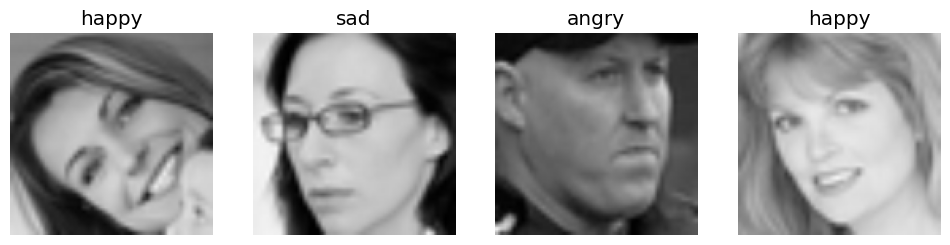

In [7]:

dls.valid.show_batch(max_n=4, nrows=1)

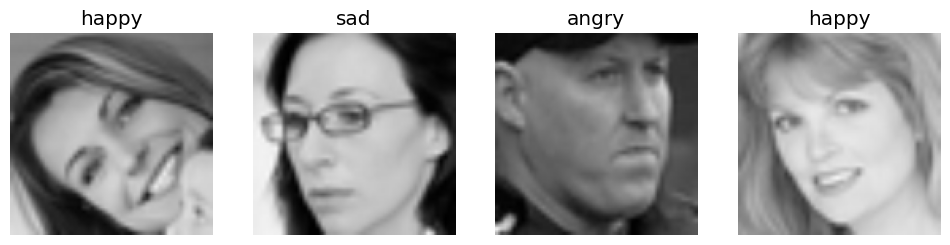

In [10]:

emotion = emotion.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = emotion.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


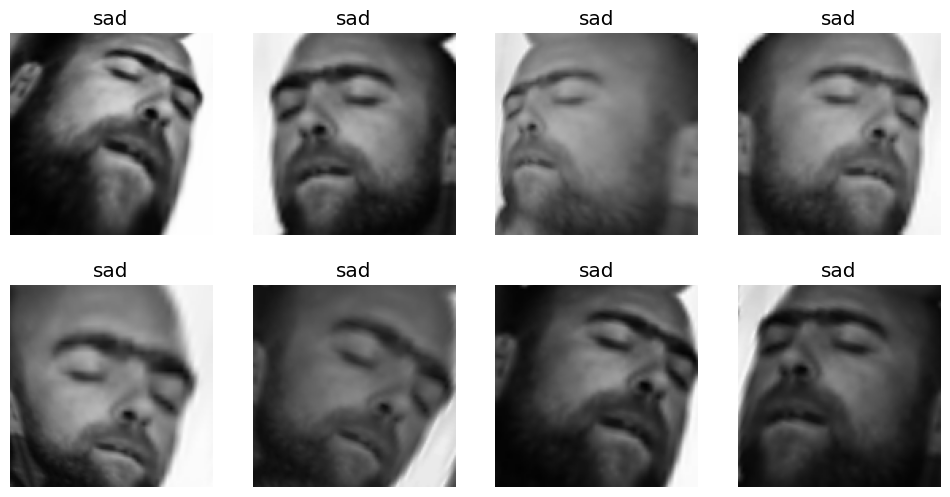

In [11]:
emotion =  emotion.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls =  emotion.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

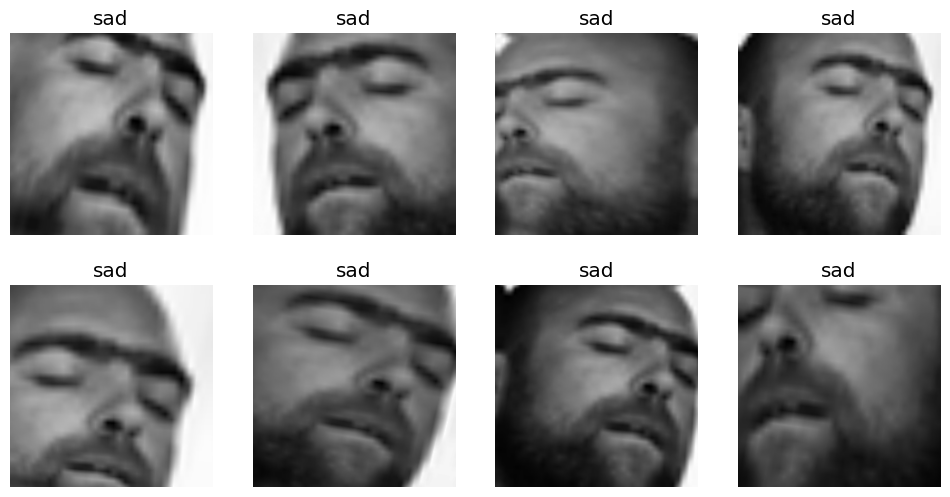

In [13]:
emotion= emotion.new(

   item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

dls = emotion.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.913038,1.626605,0.600941,16:46


epoch,train_loss,valid_loss,error_rate,time
0,1.405699,1.227395,0.455844,20:14
1,1.194787,1.072658,0.401672,15:35
2,1.066635,0.991866,0.377112,17:12
3,0.996598,0.977687,0.371886,16:50


In [15]:
learn.export()


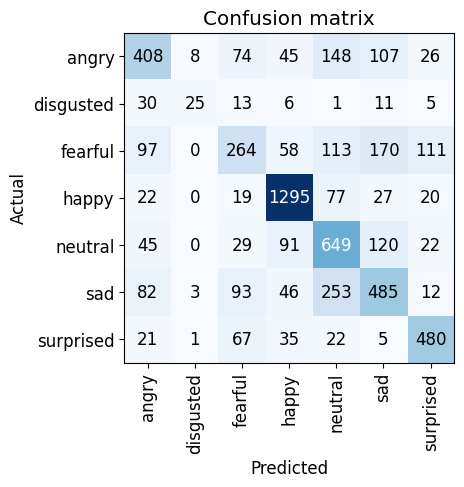

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()